# Machine learning for intelligent transportation systems
1. •	Data Cleaning and Preprocessing.
1. •	Traffic Prediction (Using Time Series Prediction Methods).



In [1]:
#Semester: 2021-2022/II.
#Coordinator: Simon Vilmos PhD
#Teacher: Mohammad Bawaneh


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gettraf-data/hourly_AvgSpeeds.csv
/kaggle/input/gettraf-data/30sec_volumes.csv
/kaggle/input/gettraf-data/hourly_SpeedBins.csv
/kaggle/input/gettraf-data/HourlyVol-20220301-20220328.csv
/kaggle/input/gettraf-data/30sec_occ.csv
/kaggle/input/gettraf-data/DailyVol.csv
/kaggle/input/gettraf-data/30sec_speeds.csv


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [4]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error,mean_absolute_error
import seaborn as sns

In [5]:
occupancies_30=pd.read_csv('../input/gettraf-data/30sec_occ.csv',index_col='time')

speeds_30=pd.read_csv('../input/gettraf-data/30sec_speeds.csv')

volums_30=pd.read_csv('../input/gettraf-data/30sec_volumes.csv')

DailyVols=pd.read_csv('../input/gettraf-data/DailyVol.csv')

HourlyVols=pd.read_csv('../input/gettraf-data/HourlyVol-20220301-20220328.csv',parse_dates=[['date', 'hour']],)

hourly_AvgSpeed=pd.read_csv('../input/gettraf-data/hourly_AvgSpeeds.csv')

hourly_SpeedBins=pd.read_csv('../input/gettraf-data/hourly_SpeedBins.csv')


# Data Cleaning and Preprocessing

In [6]:
#occupancies_30
#HourlyVols

In [7]:
#sns.heatmap(HourlyVols.corr())

In [8]:
#occupancies_30.info()
#HourlyVols.info()


In [9]:
#occupancies_30.isnull()
#HourlyVols.isnull()

In [10]:
#occupancies_30.isna().sum()
#HourlyVols.isna().sum()


In [11]:
#occupancies_30['sensor6908']=occupancies_30['sensor6908'].replace(-1,None)
HourlyVols['TotalVol']=HourlyVols['TotalVol'].replace(-1,np.nan)



In [12]:
#occupancies_30.isna().sum()
#HourlyVols.isna().sum()

In [13]:
HourlyVols=HourlyVols.ffill()
HourlyVols=HourlyVols.bfill()



In [14]:
HourlyVols['date_hour'] = pd.to_datetime(HourlyVols['date_hour'], format='%m/%d/%Y  %H')

In [15]:
HourlyVols['date_hour']=pd.DataFrame(HourlyVols['date_hour'])

In [16]:
HourlyVols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_hour  672 non-null    datetime64[ns]
 1   6908       672 non-null    int64         
 2   TotalVol   672 non-null    int64         
 3   6908-mis%  672 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 21.1 KB


In [17]:
HourlyVols=HourlyVols.set_index('date_hour')

In [18]:
#print(-1 in dataframe['sensor6908'].unique())
print(-1 in HourlyVols['TotalVol'].unique())


False


<AxesSubplot:xlabel='date_hour'>

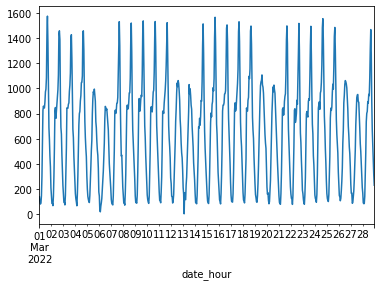

In [19]:
#plt.figure(figsize=(30,15))
HourlyVols['TotalVol'].plot()
#plt.plot(HourlyVols["TotalVol"])

In [20]:
#import plotly.express as px
#fig = px.line(s) #s[1:200]
#fig.show()
##s = pd.Series(HourlyVols.TotalVol) #s

In [21]:
from statsmodels.tsa.api import SimpleExpSmoothing,Holt

In [22]:
#smothing=s [1:200]     ;#[1:100]
#smothing

In [23]:
HourlyVols

,6908,TotalVol,6908-mis%
date_hour,,,
2022-03-01 00:00:00,135,135,0.0
2022-03-01 01:00:00,96,96,0.0
2022-03-01 02:00:00,78,78,0.0
2022-03-01 03:00:00,87,87,0.0
2022-03-01 04:00:00,144,144,0.0
...,...,...,...
2022-03-28 19:00:00,673,673,0.0
2022-03-28 20:00:00,550,550,0.0
2022-03-28 21:00:00,452,452,0.0


In [24]:
HourlyVols = HourlyVols['TotalVol']
HourlyVols=pd.DataFrame(HourlyVols)

In [25]:
HourlyVols.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672 entries, 2022-03-01 00:00:00 to 2022-03-28 23:00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   TotalVol  672 non-null    int64
dtypes: int64(1)
memory usage: 10.5 KB


In [26]:
Simple_fit1 = SimpleExpSmoothing(HourlyVols).fit(smoothing_level=0.2,optimized=False)
Simple_fit2 = SimpleExpSmoothing(HourlyVols).fit(smoothing_level=0.8,optimized=False)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.

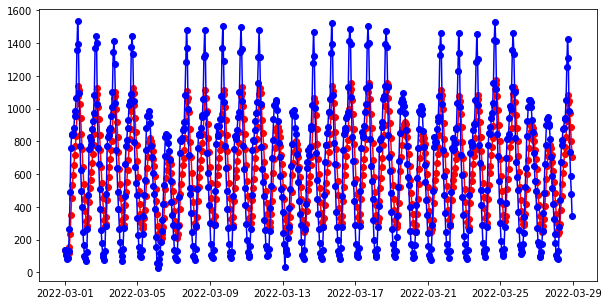

In [27]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.plot(Simple_fit1.fittedvalues,marker='o',color='red')
plt.plot(Simple_fit2.fittedvalues,marker='o',color='blue')

In [28]:
HourlyVols.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672 entries, 2022-03-01 00:00:00 to 2022-03-28 23:00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   TotalVol  672 non-null    int64
dtypes: int64(1)
memory usage: 10.5 KB


In [29]:
df_1=HourlyVols.values
df_1=df_1.astype('float32')
scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(df_1)

In [30]:
timestep = 5

X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 450
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]

In [31]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=200, verbose=0) 

2022-04-23 21:49:16.474484: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-23 21:49:16.574195: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-23 21:49:16.575306: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-23 21:49:16.576875: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 128)            384       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 128)            32896     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2, 128)            32896     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               12900     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [33]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [34]:
preds = model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)



2942.3826

In [35]:
mean_absolute_error(Ytest,preds)

41.793037

In [36]:
mean_squared_log_error(Ytest,preds)

0.028094329

In [37]:
RMSE=np.sqrt(mean_squared_error(Ytest,preds))
#RMSE
print(RMSE)

54.243732


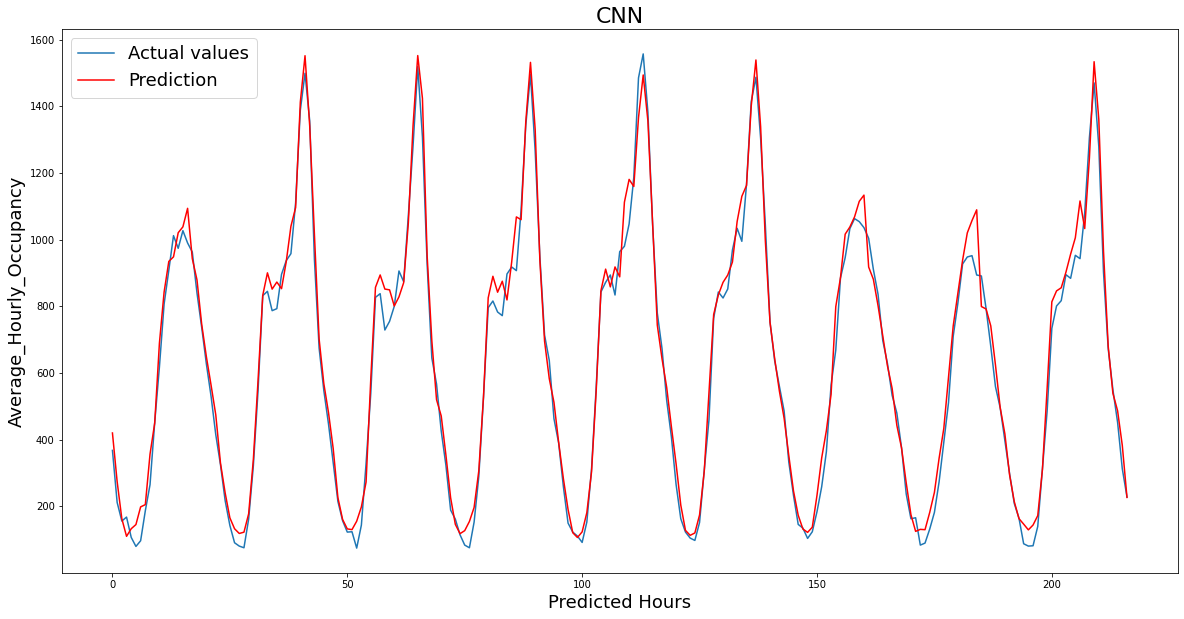

In [38]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.plot(Ytest,label ='Actual values')
pyplot.plot(preds, 'r',label ='Prediction')
pyplot.legend(fontsize = 18)
plt.xlabel('Predicted Hours', fontsize = 18)
plt.ylabel('Average_Hourly_Occupancy', fontsize = 18)
plt.title('CNN', fontsize = 22)
pyplot.show()

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


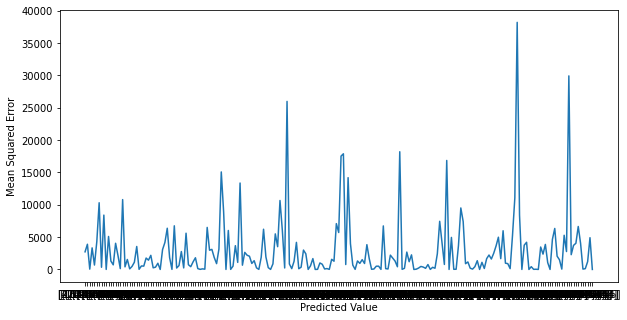

In [39]:

expected = Ytest
# predicted value
predicted =preds
# calculate errors
errors = list()
for i in range(len(expected)):
    err = (expected[i] - predicted[i])**2
    errors.append(err)
pyplot.figure(figsize=(10,5))
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

In [40]:
df_2=HourlyVols.values
df_2=df_2.astype('float32')
scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(df_2)

In [41]:
timestep = 5

X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 450
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]

In [42]:
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten

In [43]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(5,1)))
model_lstm.add(Dense(1))  
model_lstm.compile(loss='mse', optimizer='adam')
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [44]:
model_lstm.fit(Xtrain, Ytrain, epochs=200, verbose=0) 

In [45]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [46]:
preds2 = model_lstm.predict(Xtest)
preds2 = scaler.inverse_transform(preds2)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds2)


3168.3975

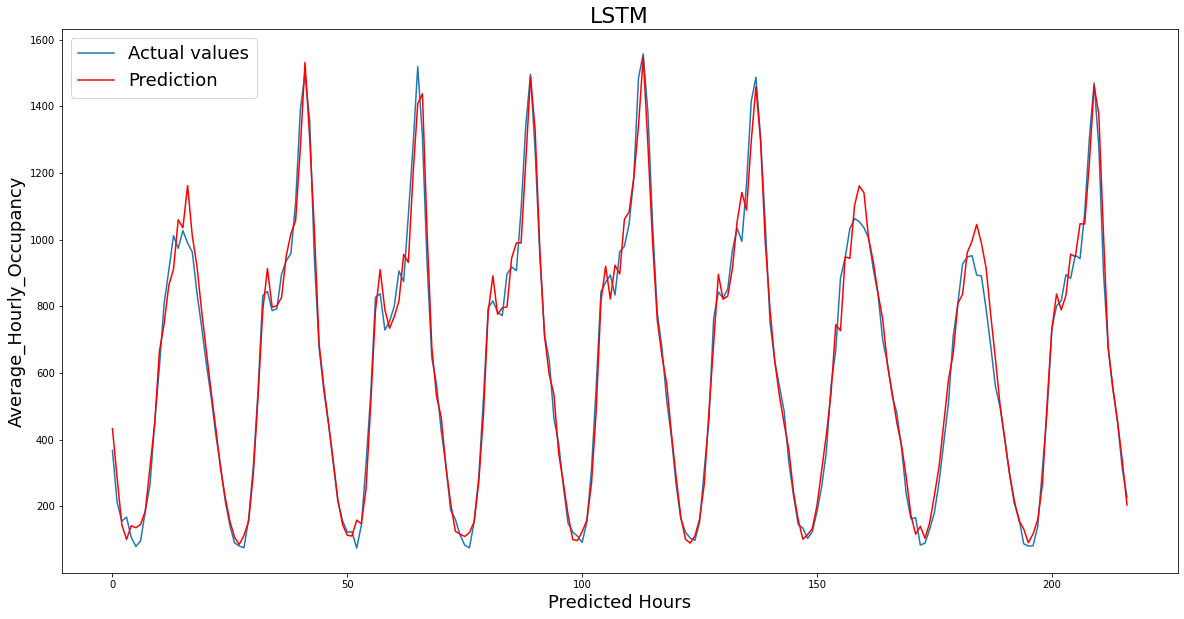

In [47]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.plot(Ytest,label ='Actual values')
pyplot.plot(preds2, 'r',label ='Prediction')
pyplot.legend(fontsize = 18)
plt.xlabel('Predicted Hours', fontsize = 18)
plt.ylabel('Average_Hourly_Occupancy', fontsize = 18)
plt.title('LSTM', fontsize = 22)
pyplot.show()

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


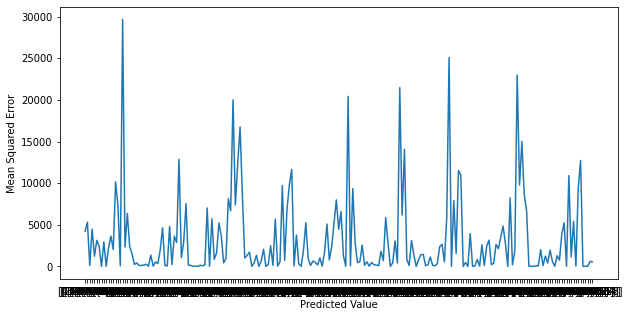

In [48]:
expected = Ytest
# predicted value
predicted =preds2
# calculate errors
errors = list()
for i in range(len(expected)):
    err = (expected[i] - predicted[i])**2
    errors.append(err)
pyplot.figure(figsize=(10,5))
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

In [49]:
df_3=HourlyVols.values
df_3=df_3.astype('float32')
scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(df_3)

In [50]:
timestep = 5

X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 450
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]

In [51]:
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional,RNN
from tensorflow.keras.optimizers import SGD

In [52]:
 regressorGRU = Sequential()
 regressorGRU.add(GRU(50, activation='relu', input_shape=(5,1)))
 regressorGRU.add(Dense(1))  
regressorGRU.compile(loss='mse', optimizer='adam')
 regressorGRU.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 50)                7950      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 8,001
Trainable params: 8,001
Non-trainable params: 0
_________________________________________________________________


In [53]:
regressorGRU.fit(Xtrain, Ytrain, epochs=200, verbose=0) 

In [54]:
Xtest = X[k:,:,:]  
Ytest= Y[k:] 

In [55]:
preds3 = regressorGRU.predict(Xtest)
preds3 = scaler.inverse_transform(preds3)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds3)

3566.9573

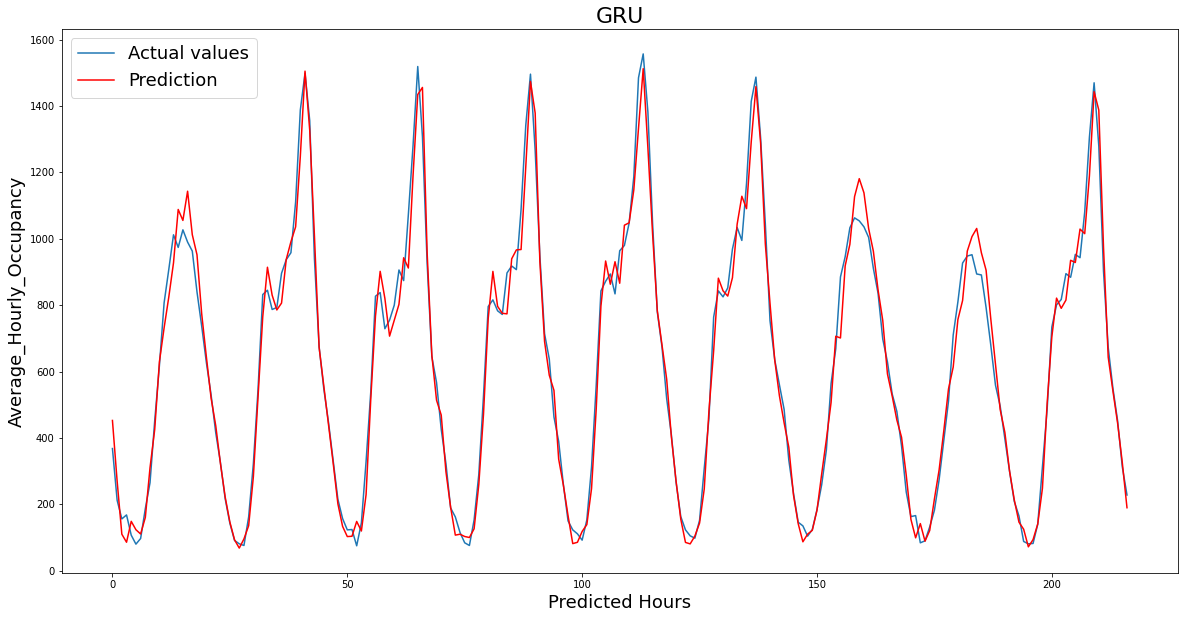

In [56]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.plot(Ytest,label ='Actual values')
pyplot.plot(preds3, 'r',label ='Prediction')
pyplot.legend(fontsize = 18)
plt.xlabel('Predicted Hours', fontsize = 18)
plt.ylabel('Average_Hourly_Occupancy', fontsize = 18)
plt.title('GRU', fontsize = 22)
pyplot.show()

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


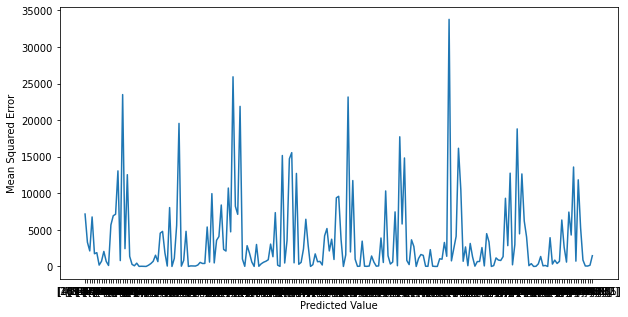

In [57]:
expected = Ytest
# predicted value
predicted =preds3
# calculate errors
errors = list()
for i in range(len(expected)):
    err = (expected[i] - predicted[i])**2
    errors.append(err)
pyplot.figure(figsize=(10,5))
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

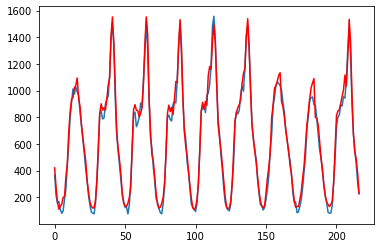

In [58]:
pyplot.plot(Ytest,label ='Actual values')
pyplot.plot(preds, 'r',label ='Prediction')

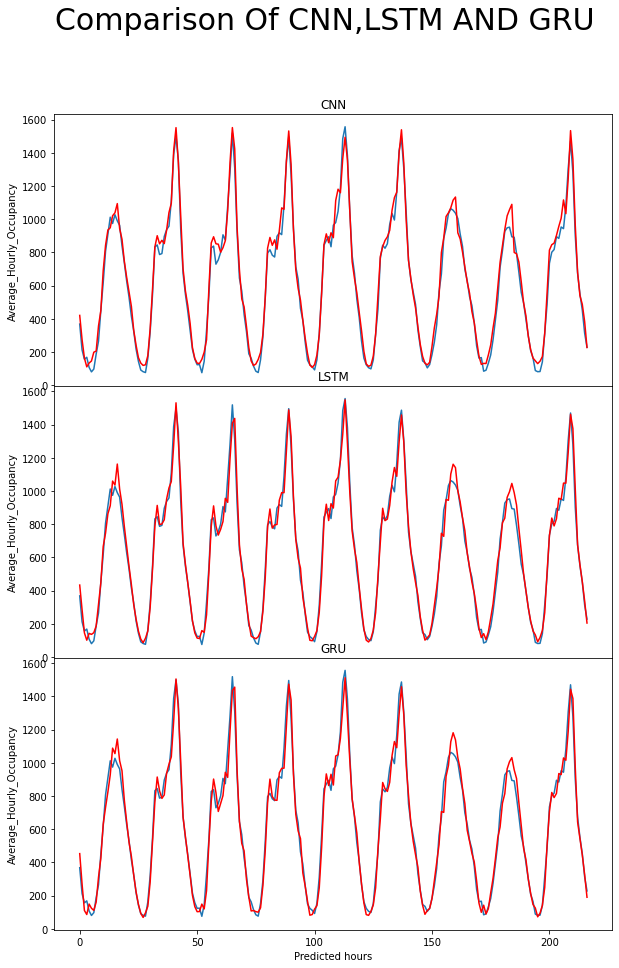

In [59]:
fig = plt.figure(figsize=(10,15))
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Comparison Of CNN,LSTM AND GRU',fontsize = 30)
axs[0].plot(Ytest)
axs[0].plot(preds,"r")
axs[0].set_title('CNN')
axs[1].plot(Ytest)
axs[1].plot(preds2,"r")
axs[1].set_title('LSTM')
axs[2].plot(Ytest)
axs[2].plot(preds3,"r")
axs[2].set_title('GRU')
for ax in axs.flat:
    ax.set(xlabel='Predicted hours', ylabel='Average_Hourly_Occupancy')